In [1]:
include("../../HamiltonODE.jl")
using Plots
pyplot();

Finished loading HamiltonSystem
Finished loading HamiltonSteps
Finished loading HamiltonIntegrator
Finished loading HamiltonPlot
Finished loading HamiltonODE


In [2]:
d = 2
m = ((2,2/3),)
q0 = [0.5,1.0]
p0 =[0.1,0.1]

phi(r) = 4*(r^-12-r^-6)
dphi(r) = 4*(-12*r^-13 +6*r^-7)

U(q) = 2*phi(norm(q))+phi(2*q[1])
F(q) =-2*dphi(norm(q))*q/norm(q)-dphi(2*q[1])*2*[1,0]


HS = HamiltonSystem(d,m,q0,p0,F,U);

In [3]:
T=2.5

Is = [
    [Integrator(euler_step,0.1*2.0^-i,T) for i in 0:4];
    Integrator(verlet_step,1e-5,T)
    ];
ts,Qs,Ps = integrate(HS,Is);

Integrating using verlet_step dt = 1.0e-5...100%|███████| Time: 0:00:02m


In [4]:
names = getNames(Is)
EnergyErrors = getEnergyErrors(HS,Qs,Ps);

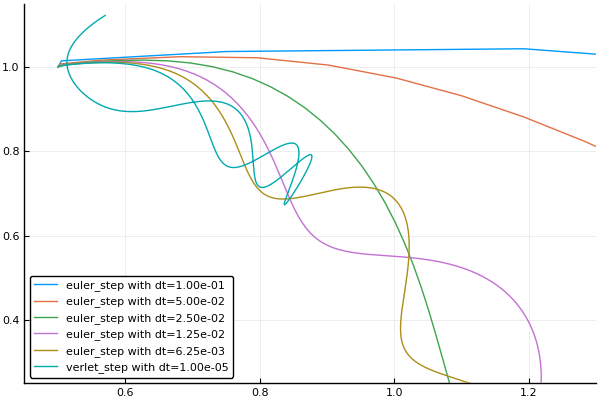

In [5]:
plotOrbits(Qs,names,xlim=(0.45, 1.3),ylim=(0.25,1.15))

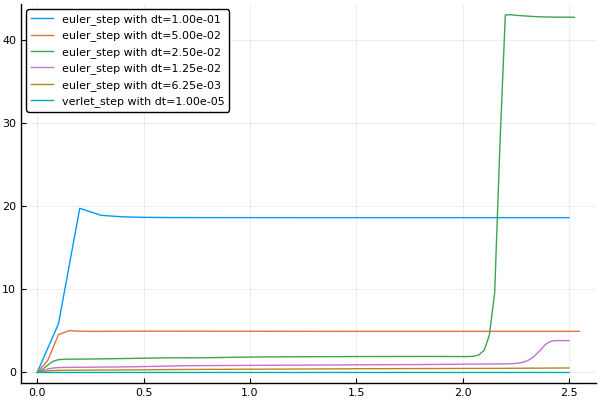

In [6]:
plot(ts,EnergyErrors,label=hcat(names...))